## Importing Packages

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import naive_bayes 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/My Pc/Course/Globsyn(ML)/Data/shopintention.csv") #Reading the csv dataset

In [3]:
df[:5]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info() #features of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()# Statistical details of the dataframe

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
print ("The shape of the  data is (row, column):"+ str(df.shape)) 

The shape of the  data is (row, column):(12330, 18)


In [7]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)#checking null values

Administrative             0.113544
Informational              0.113544
Informational_Duration     0.113544
ProductRelated             0.113544
ProductRelated_Duration    0.113544
BounceRates                0.113544
ExitRates                  0.113544
Administrative_Duration    0.113544
Region                     0.000000
Weekend                    0.000000
VisitorType                0.000000
TrafficType                0.000000
SpecialDay                 0.000000
Browser                    0.000000
OperatingSystems           0.000000
Month                      0.000000
PageValues                 0.000000
Revenue                    0.000000
dtype: float64

In [8]:
df.isna().sum()# checking total null values present in the dataframe

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [9]:
df.dropna(inplace=True)# Dropping the null values

### Generating numerical and categorical columns

In [12]:
numcols=list(X.select_dtypes(exclude='object').columns)
catcols=list(X.select_dtypes(include='object').columns)

In [13]:
numcols.remove('Browser')
numcols.remove('TrafficType')
numcols.remove('OperatingSystems')
numcols.remove('Region')

In [14]:
catcols.append('Browser')
catcols.append('TrafficType')
catcols.append('OperatingSystems')
catcols.append('Region')

In [15]:
print('CATEGORICAL COLUMNS::',catcols)
print('NUMERICAL COLUMNS::',numcols)

CATEGORICAL COLUMNS:: ['Month', 'VisitorType', 'Browser', 'TrafficType', 'OperatingSystems', 'Region']
NUMERICAL COLUMNS:: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend']


## Exploratory Data Analysis

<AxesSubplot:xlabel='Month', ylabel='count'>

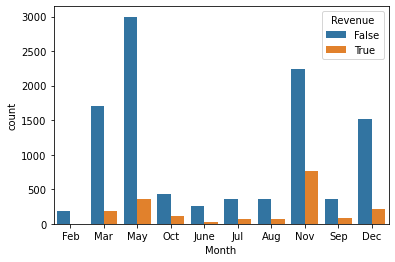

In [16]:
sns.countplot(x='Month',hue='Revenue',data=df)

<AxesSubplot:xlabel='Weekend', ylabel='count'>

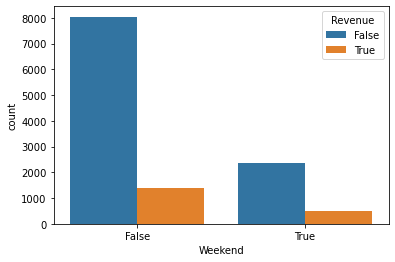

In [17]:
sns.countplot(x='Weekend',hue='Revenue',data=df)

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

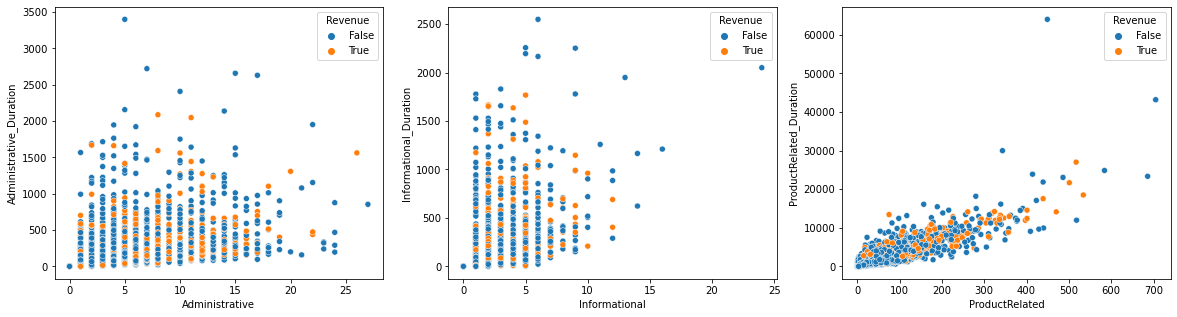

In [18]:
plt.figure(figsize = (20, 5))
#plt.style.use('seaborn-white')
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=df)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=df)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=df)

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

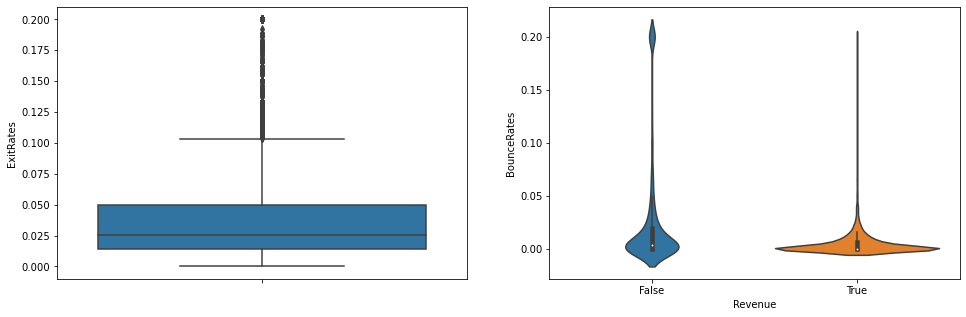

In [22]:
plt.figure(figsize=(25,5))
plt.subplot(131)
sns.boxplot(y='ExitRates',hue='Revenue', data=df)
plt.subplot(132)
sns.violinplot(y='BounceRates',x='Revenue',data=df)

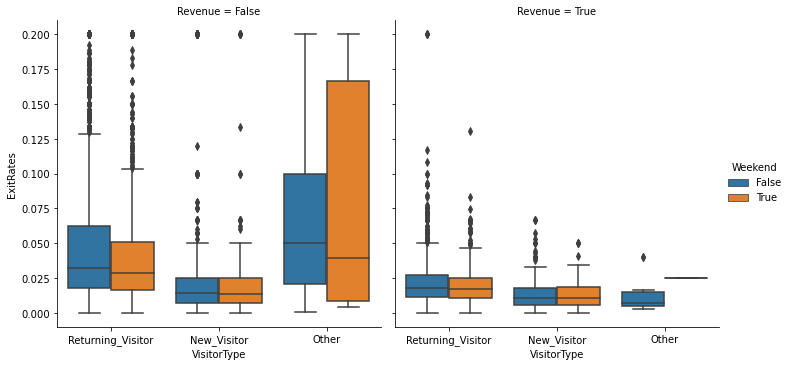

In [21]:
sns.catplot(x="VisitorType",y="ExitRates",hue="Weekend",col="Revenue",data=df,kind="box")

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

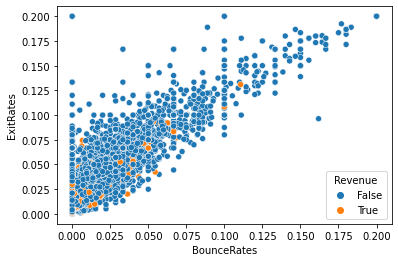

In [22]:
sns.scatterplot(x='BounceRates',y='ExitRates',hue='Revenue',data=df)

<AxesSubplot:xlabel='Month', ylabel='PageValues'>

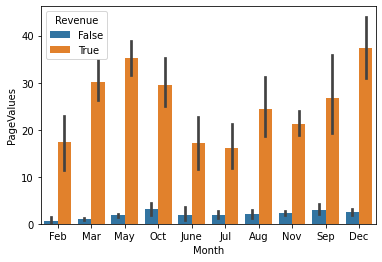

In [23]:
sns.barplot(x='Month', y='PageValues', data=df,hue='Revenue')

In [24]:
df['PageValues'].describe()# statistical description of 'PageValues columns'

count    12316.000000
mean         5.895952
std         18.577926
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Density'>

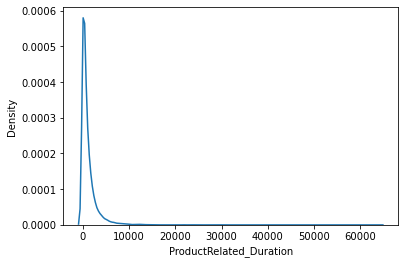

In [25]:
sns.distplot(df['ProductRelated_Duration'],hist=False)

<AxesSubplot:xlabel='Informational', ylabel='Density'>

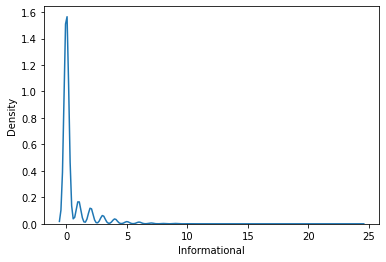

In [26]:
sns.distplot(df['Informational'],hist=False)

<AxesSubplot:>

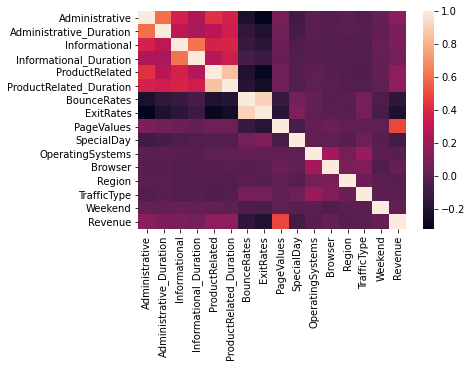

In [27]:
sns.heatmap(df.corr()) # Checking the correlation between the columns

##  Dividing the data into X and Y

In [11]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

## Labeling Object Columns

In [29]:
X['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [30]:
y=y.replace({True:1,False:0})

In [31]:
def label(col):
    i=0
    for var in X[col].unique():
         X[col]=X[col].replace({var:i})
         i=i+1

In [32]:
label('Month')

In [33]:
X['Weekend']=X['Weekend'].replace({True:1,False:0})

In [34]:
catcolsnew=({'VisitorType'})

In [35]:
Xohe=pd.get_dummies(X,columns=catcolsnew,drop_first=True)#implementing Xohe

In [36]:
Xohe[:5]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,0,1,1,1,1,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,0,2,2,1,2,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,0,4,1,9,3,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,0,3,2,2,4,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,0,3,3,1,4,1,0,1


In [37]:
Xohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12316 non-null  float64
 1   Administrative_Duration        12316 non-null  float64
 2   Informational                  12316 non-null  float64
 3   Informational_Duration         12316 non-null  float64
 4   ProductRelated                 12316 non-null  float64
 5   ProductRelated_Duration        12316 non-null  float64
 6   BounceRates                    12316 non-null  float64
 7   ExitRates                      12316 non-null  float64
 8   PageValues                     12316 non-null  float64
 9   SpecialDay                     12316 non-null  float64
 10  Month                          12316 non-null  int64  
 11  OperatingSystems               12316 non-null  int64  
 12  Browser                        12316 non-null 

In [38]:
Xohe.shape

(12316, 18)

## Dividing the data into training and test data

In [39]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(Xohe,y,test_size=0.15,random_state=42)

## Implementing Scaling

In [40]:
numcols

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Weekend']

In [41]:
numcols.remove('Weekend')

In [42]:
scaler=preprocessing.StandardScaler()
scaler.fit(Xtrain[numcols])
Xtrain[numcols]=scaler.transform(Xtrain[numcols])
Xtest[numcols]=scaler.transform(Xtest[numcols])

In [43]:
Xtrain[:5].shape

(5, 18)

In [44]:
def printmetrics(actual,predicted):
    print('AUC:: ',np.round(metrics.roc_auc_score(actual,predicted),4))
    print('Accuracy:: ',np.round(metrics.accuracy_score(actual,predicted),4))
    print('Precision:: ',np.round(metrics.precision_score(actual,predicted),4))
    print('Recall:: ',np.round(metrics.recall_score(actual,predicted),4))
    print('F1:: ',np.round(metrics.f1_score(actual,predicted),4))

## Implementing RFE to build model

In [45]:
rfeobj=feature_selection.RFE(estimator=RandomForestClassifier())
grid={"n_features_to_select":list(range(1,10,2))}
gridobj=model_selection.GridSearchCV(estimator=rfeobj,param_grid=grid,cv=5,scoring="recall",return_train_score=True,n_jobs=-1)
gridobj.fit(Xtrain,ytrain)
cvdf=pd.DataFrame(gridobj.cv_results_)
cvdf[["params","mean_train_score","mean_test_score"]]

,params,mean_train_score,mean_test_score
0,{'n_features_to_select': 1},0.805709,0.497585
1,{'n_features_to_select': 3},0.994658,0.559262
2,{'n_features_to_select': 5},0.997406,0.564147
3,{'n_features_to_select': 7},0.997253,0.562922
4,{'n_features_to_select': 9},0.999847,0.578802


## getting best model parameter

In [46]:
print(gridobj.best_params_)
print(gridobj.best_score_)
bestmodel=gridobj.best_estimator_
bestcols=list(Xtrain.columns[bestmodel.support_])
bestcols

{'n_features_to_select': 9}
0.5788021182964123


['Administrative',
 'Administrative_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'Month',
 'TrafficType']

# Building Models

In [47]:
rf=RandomForestClassifier()                                                ## creating random forest model object
gb=GradientBoostingClassifier()                                            ## creating gradient boosting classifier model object                                                                ## creating svc model object
lr=LogisticRegression()                                                    ## creating logisitc regression model object
nb=naive_bayes.GaussianNB()                                                ## creating naive bayes model object
model=neighbors.KNeighborsClassifier(n_neighbors=5)                        ## creating KNN model object
dt=tree.DecisionTreeClassifier()                                           ## creating decision tree model object

## fitting the data into the respective models
rf.fit(Xtrain[bestcols],ytrain)
gb.fit(Xtrain[bestcols],ytrain)
lr.fit(Xtrain[bestcols],ytrain)
nb.fit(Xtrain[bestcols],ytrain)
model.fit(Xtrain[bestcols],ytrain)
dt.fit(Xtrain[bestcols],ytrain)

## predicting the data
ypredrf=rf.predict(Xtest[bestcols])
ypredgb=gb.predict(Xtest[bestcols])
ypredlr=lr.predict(Xtest[bestcols])
yprednb=nb.predict(Xtest[bestcols])
ypredmod=model.predict(Xtest[bestcols])
ypreddt=model.predict(Xtest[bestcols])

## evaluating the model
print("Random Forest test accuracy",metrics.recall_score(ytest,ypredrf))
print("Gradient Boosting test accuracy",metrics.recall_score(ytest,ypredgb))
print("Logistic Regression test accuracy",metrics.recall_score(ytest,ypredlr))
print("Naive bayes test accuracy",metrics.recall_score(ytest,yprednb))
print("KNN test accuracy",metrics.recall_score(ytest,ypredmod))
print("Decision tree test accuracy",metrics.recall_score(ytest,ypreddt))

Random Forest test accuracy 0.5925925925925926
Gradient Boosting test accuracy 0.6222222222222222
Logistic Regression test accuracy 0.34074074074074073
Naive bayes test accuracy 0.6481481481481481
KNN test accuracy 0.48148148148148145
Decision tree test accuracy 0.48148148148148145


In [48]:
# Number of trees in random forest
n_estimators=[20,60,100,120]

# Number of features to consider at every split
max_features=[0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth=[2,8,None]

# Number of samples
max_samples=[0.5,0.75,1.0]

# bootstrap samples
bootstrap=[True,False]

# Minimum number of samples requires to split a node
min_samples_split=[2,5]

# Minimum number of samples requires at each leaf node
min_samples_leaf=[1,2]

param_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
}
print(param_grid)

obj=model_selection.GridSearchCV(estimator=gb , param_grid=param_grid, cv=5 ,verbose=2,n_jobs=-1, scoring='recall')

obj.fit(Xtrain[bestcols],ytrain)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 60, 100, 120]},
             scoring='recall', verbose=2)

In [49]:
print(obj.best_params_)
print(obj.best_score_)
testpred=obj.predict(Xtest[bestcols])
print(metrics.f1_score(ytest,testpred))

{'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}
0.6312933542179457
0.6529080675422139


In [50]:
def printscores(actual,pred):
    print("AUC:",metrics.roc_auc_score(actual,pred))
    print("accuracy:",metrics.accuracy_score(actual,pred))
    print("recall  :",metrics.recall_score(actual,pred))
    print("precision :",metrics.precision_score(actual,pred))
    print("f1-score : ",metrics.f1_score(actual,pred))

In [51]:
print(obj.best_params_)
print(obj.best_score_)
testpred=obj.predict(Xtest[bestcols])
trainpred=obj.predict(Xtrain[bestcols])

{'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}
0.6312933542179457


In [52]:
print('Training Metrics::')
print('..................')
printmetrics(ytrain,trainpred)

print('Test Metrics::')
print('..................')
printmetrics(ytest,testpred)

Training Metrics::
..................
AUC::  0.8081
Accuracy::  0.912
Precision::  0.7498
Recall::  0.6569
F1::  0.7003
Test Metrics::
..................
AUC::  0.794
Accuracy::  0.8999
Precision::  0.6616
Recall::  0.6444
F1::  0.6529
